In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
os.chdir('..')
import rwpropa as rw

In [3]:
nr_particles = 10**3
sphere = 10**14
def analize(file_name, diff, nr_particles=nr_particles):
    plt.figure(figsize=(5,3))
    df = pd.read_pickle(file_name+'.pkl')
    bins = 20
    trajectory_lengths = df['d']
    d = trajectory_lengths/10**14
    hist, bins = np.histogram(d, bins=bins)
    logbins = np.logspace(np.log10(min(d)),np.log10(max(d)),len(bins))
    plt.hist(d, bins=logbins, alpha=0.5, label='$\kappa =$ {:.1e}m$^2$/s'.format(diff))
    plt.axvline(x=1, color='k', ls='--', label='plasmoid radius')
    plt.title('total # particles = {:.0e}'.format(nr_particles))
    plt.xlabel('D/{:.0e}m'.format(sphere))
    plt.ylabel('# particles')
    plt.loglog()
    plt.legend()
    plt.show()
    
    plt.figure(figsize=(5,3))
    bins = 50
    trajectory_lengths = df['d']
    d = trajectory_lengths/10**14
    hist, bins = np.histogram(d, bins=bins)
    linbins = np.linspace((min(d)),(max(d)),len(bins))
    plt.hist(d, bins=linbins, alpha=0.5, label='$\kappa =$ {:.1e}m$^2$/s'.format(diff))
    plt.axvline(x=1, color='k', ls='--', label='plasmoid radius')
    plt.title('total # particles = {:.0e}'.format(nr_particles))
    plt.xlabel('D/{:.0e}m'.format(sphere))
    plt.ylabel('# particles')
    plt.legend()
    plt.show()

###  Simulation
#### Point source with time evolution observer
All particles start in the center with isotropic directions (i,i,i), with i=-1 or i =1. Observe all particles n times (with log spacing time intervalls). At each observed time, the running diffusion coefficients (1. plot) and the particle distribution (2. and 3. plots) can be plottet. The latter show that particles start in the center and propagate in positive or negative direction (2. plot) and diffuse after some time (plateau in 1. plot) and Gaus-distribution in the 3. plot.

In [4]:
diff = 10**21 #[m^2/s]

#### Point source with spherical observer
All particles start in the center with isotropic directions (i,i,i), with i=-1 or i =1. Observe particles only when they cross the spherical observer. Take observed particles out of the simulation, because they are treated as escaped. The plots show ne number of escaping particles per bin as a function of the travelled distance in plasmoid radii.

In [4]:
file_2 = 'data/data_tut_5_point_sphere_hist'
run_simulation(point_source(), sphere_observer(), propagator(step_size=step_size, diff=diff, nr_steps=1*10**4), file_2)
analize(file_2, diff)

NameError: name 'run_simulation' is not defined

#### Spherical source with spherical observer
Same as above but with homogeneouse particle distribution within complete plasmoid.

simulate with a diffusion coefficient of  1e+21 m²/s
start simulation
Propagator initialized
Observer initialized
saved data file data/data_tut_5_sphere_sphere_new.pkl
CPU times: user 10.7 s, sys: 33.7 ms, total: 10.7 s
Wall time: 11.4 s


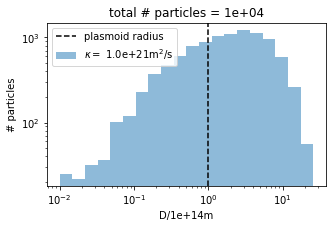

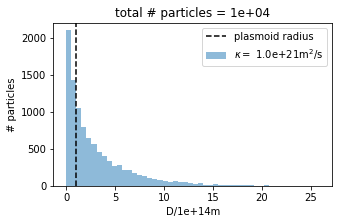

In [3]:
file_3_new = 'data/data_tut_5_sphere_sphere_new'
sim = rw.PlasmoidSimulation()
%time sim.simulate(file_3_new)
sim.analize()

Observer initialized
Propagator initialized
start simulation
CPU times: user 3.72 s, sys: 0 ns, total: 3.72 s
Wall time: 3.72 s
saved data file data/data_tut_5_sphere_sphere.pkl


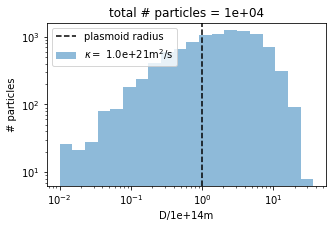

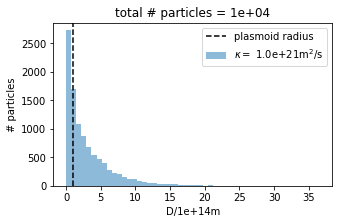

In [33]:
file_3 = 'data/data_tut_5_sphere_sphere'
run_simulation(sphere_source(), sphere_observer(), propagator(step_size=step_size, diff=diff, nr_steps=1*10**4), file_3)
analize(file_3, diff)

#### Point source with spherical observer without escape
Same as example "Point source with spherical observer" with one change: particles are not dectivated after observation and can therefore be observed several times.

Observer initialized
Propagator initialized
start simulation
CPU times: user 108 ms, sys: 4 ms, total: 112 ms
Wall time: 111 ms
saved data file data/data_tut_5_sphere_sphere_active.pkl


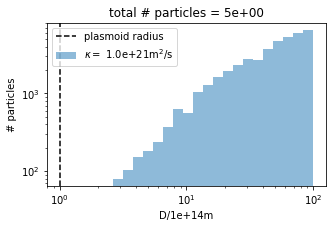

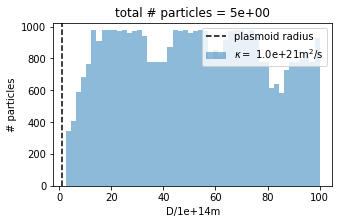

In [34]:
file_4 = 'data/data_tut_5_sphere_sphere_active'
run_simulation(point_source(nr_particles=5), sphere_observer(deactivate=False), propagator(step_size=step_size, diff=diff, nr_steps=1*10**4), file_4)
analize(file_4, diff, nr_particles=5)

### Source comparison
Comparison between a point source and a sphere source. Note that particles need trajectory legths that are larger than the plasmoid radius to escape with a cantral point source. 

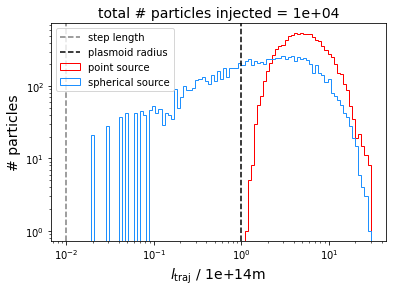

In [35]:
colors = ['r', 'dodgerblue']
labels = ['point source', 'spherical source']
bins = 100
logbins = np.logspace(np.log10(step_size/sphere), np.log10(step_size*nr_steps/sphere),bins)

for i, file in enumerate([file_2, file_3]):
    df = pd.read_pickle(file+'.pkl')
    trajectory_lengths = df['d']
    d = trajectory_lengths/sphere
    plt.hist(d, bins=logbins, histtype=u'step', edgecolor=colors[i], linewidth=1., facecolor="None", label=labels[i])

plt.axvline(x=step_size/sphere, color='grey', ls='--', label='step length')
plt.axvline(x=1, color='k', ls='--', label='plasmoid radius')

plt.title('total # particles injected = {:.0e}'.format(nr_particles), size=14)
plt.xlabel('$l_\mathrm{traj}$'+' / {:.0e}m'.format(sphere), size=14)
plt.ylabel('# particles', size=14)
plt.loglog()
plt.legend(loc = "upper left")
#plt.savefig('traj_lengths_comparison_rwpropa.pdf')
plt.show()

The issues with the initial bins for the spherical source result is caused by the fixed step size which can't resolve the small scales shown in the log-scaling of the x-axis. See the same result in a lin-lin-plot below.

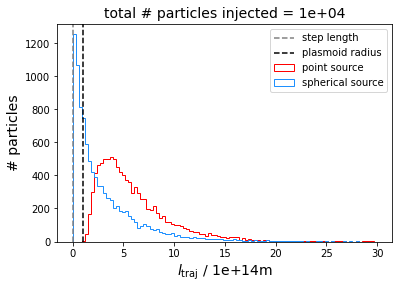

In [36]:
colors = ['r', 'dodgerblue']
labels = ['point source', 'spherical source']
bins = 100
linbins = np.linspace(step_size/sphere, (step_size*nr_steps/sphere),bins)

for i, file in enumerate([file_2, file_3]):
    df = pd.read_pickle(file+'.pkl')
    trajectory_lengths = df['d']
    d = trajectory_lengths/sphere
    plt.hist(d, bins=linbins, histtype=u'step', edgecolor=colors[i], linewidth=1., facecolor="None", label=labels[i])

plt.axvline(x=step_size/sphere, color='grey', ls='--', label='step length')
plt.axvline(x=1, color='k', ls='--', label='plasmoid radius')

plt.title('total # particles injected = {:.0e}'.format(nr_particles), size=14)
plt.xlabel('$l_\mathrm{traj}$'+' / {:.0e}m'.format(sphere), size=14)
plt.ylabel('# particles', size=14)
plt.legend(loc = "upper right")
plt.show()